<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Idea juntar varios arboles
https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#%%timeit
from google.colab import files
import sys
sys.path.append('/content/drive/My Drive')
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf
#from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192,Snippet_190, ROC_
#from ipynb.fs.full.my_functions import load_clean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn import tree as tr_
import pydotplus
import collections
!pip install ipywidgets==7.4
import ipywidgets as widgets
from sklearn.tree import DecisionTreeClassifier

# Lista de caracteristicas posibles del modelo, de entre ellas se prueban disitintas selecciones:
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
          'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
          'flux_density_error', 'energy_flux', 'energy_flux_error',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'flux_100_300_mev_pos_err',
          'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
          'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']

  


# Trabajamos con 3 separciones poblacionales 

1.   pop1
2.   pop2
3.   full
## La separación de estas poblaciones se puede encontrar en:
https://colab.research.google.com/drive/1D4dCevS0IlVaqjwkLjBT4RaQilZmDatu#scrollTo=vuzPV4sqrstv


In [5]:
features_=['HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#

print ("nº de características del modelo :",len(features_))

Cargando full
(1717, 57)
nº de características del modelo : 8


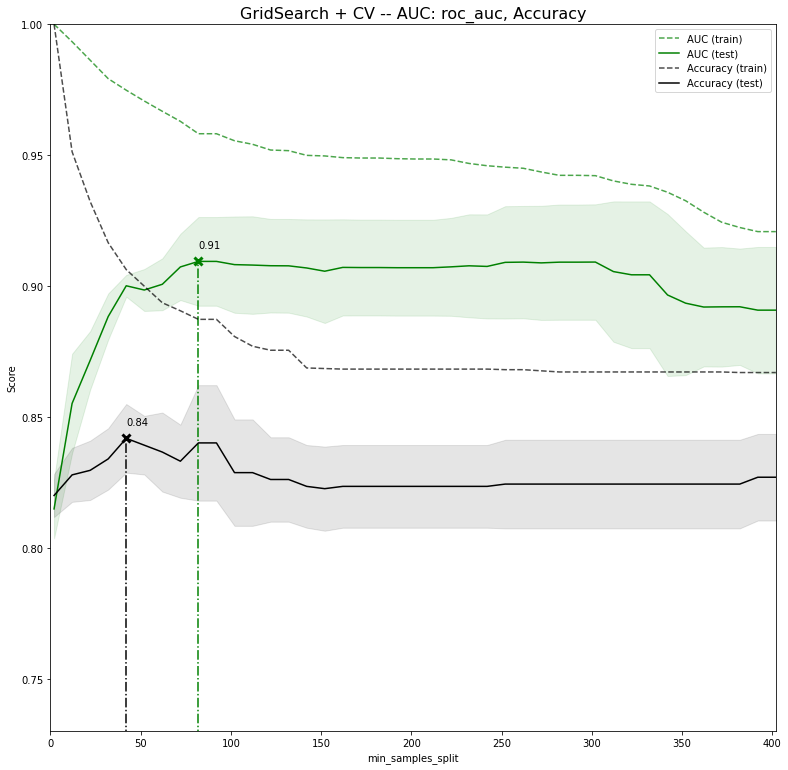

In [6]:
mf.cv_n_grid (X_std,y_)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10),'criterion' : ['entropy','gini'],'max_features': np.arange(2, len(features_)-1)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))
tree.best_params_

DecisionTree: Area under the ROC curve = 0.876155462184874


{'criterion': 'gini', 'max_depth': 5, 'max_features': 3}

In [8]:
import seaborn as sns
X.columns
#specify the 12 metrics column names to be modelled
to_model_columns=X.columns[1:13]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X[to_model_columns])
pred = clf.predict(X[to_model_columns])
print(type(pred))
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())
X['source_type']=np.array(y_)
df_ = X.loc[( X['anomaly']== -1)]
df_2 = X.loc[( X['anomaly']> -1)]
X['source_type']=np.array(y_)
df_2.head(5)


<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index,anomaly,source_type
0,-0.466534,-0.659626,-0.641768,2.719107,0.328037,0.888437,2.12832,1,1.0
1,-0.563112,-0.727332,-0.845465,2.614918,0.369390,1.027710,2.34094,1,0.0
2,-0.610184,-0.716013,-0.753035,2.469248,0.369381,1.470371,2.34089,1,0.0
3,-0.455873,-0.691567,-0.673485,2.699760,0.332907,1.178357,2.15232,1,0.0
4,-0.521313,-0.652628,-0.702739,2.566261,0.326352,1.447286,2.12008,1,0.0


In [9]:
df_std=df_2
df_y=df_std['source_type']
features_r=['HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
df_std=df_std[features_r]
df_std.head(3)

,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index
0,-0.466534,-0.659626,-0.641768,2.719107,0.328037,0.888437,2.12832
1,-0.563112,-0.727332,-0.845465,2.614918,0.369390,1.027710,2.34094
2,-0.610184,-0.716013,-0.753035,2.469248,0.369381,1.470371,2.34089


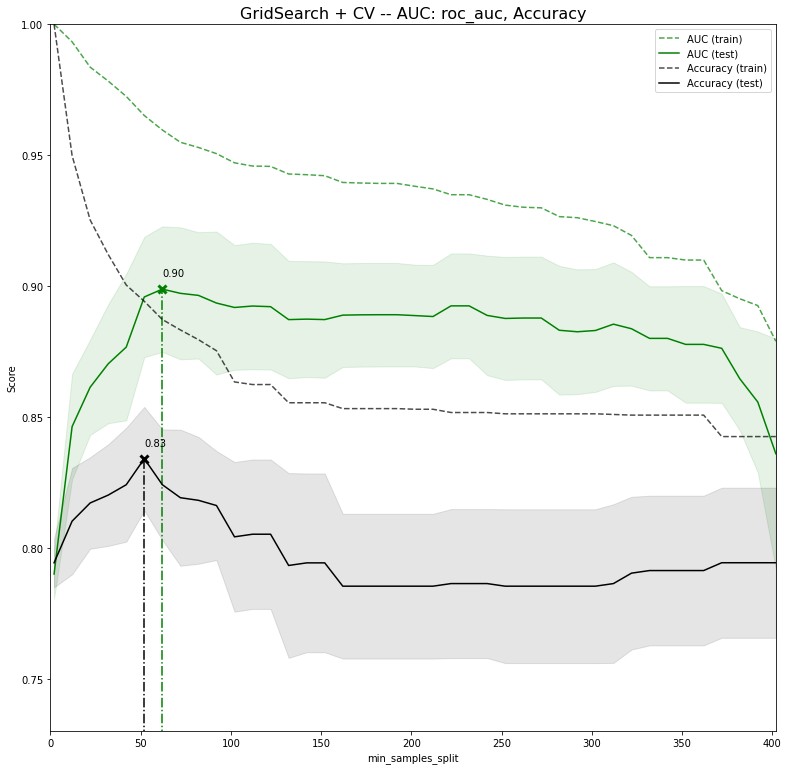

DecisionTree: Area under the ROC curve = 0.9385295299316996


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 5}

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
mf.cv_n_grid (df_std,df_y)
param_grid = {'max_depth': np.arange(3, 10),'criterion' : ['entropy','gini'],'max_features': np.arange(2, len(features_)-1)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
X_train, X_test, y_train, y_test = train_test_split(df_std, df_y, test_size=0.3)
tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))
tree.best_params_

In [0]:
   
def reduce_features (features_,df):
  from sklearn.preprocessing import StandardScaler
  new_df=df[features_]
  #df.drop(['source_type'], axis=1, inplace=True)
  sc = StandardScaler()
  sc.fit(X)
  #sc.fit(y)
  X_std = sc.transform(X)
  return new_df,X_std
#X,X_std=reduce_features(features_,X) 
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#df0.head(20)


In [26]:
#%%capture salida
from ipywidgets import  interact, widget  
from ipywidgets import  interact_manual
#from ipywidgets  import TwoByTwoLayout, AppLayout, GridspecLayout
from ipywidgets import interactive,interact, HBox, Layout,VBox

from ipywidgets import IntSlider
#size_subset = [0.2,0.25,0.3,0.35,0.4]
#@interact
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
 


def echo(Save='Salvar archivo como...', size_subset=[0.3, 0.2, 0.25, 0.3,0.35, 0.4,0.5,0.6,0.7,0.8,0.9],loss=['entropy','gini'],max_depth=[2,3,4,5,6,7,9,10,11],max_features=IntSlider(min=2, max=len(features_)-1, step=1),Save_model=False):

  # hay que devolver X_std normalizado con el numero de caracteriscitcas reducidas usando reduce_features()
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=size_subset)
  tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion=loss,
                       max_depth=max_depth, max_features=max_features, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
  clf =tree.fit(X_train, y_train)
  echo.widget.layout.flex_flow='row wrap'
  # widget=interactive(echo,Save='Salvar archivo como...', size_subset=[0.2,0.25,0.3,0.35,0.4],loss=['entropy','gini'],split=100)
  #controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
  #output = widget.children[-1]
  #display(VBox([controls, output]))  


  print("test score: ",tree.score(X_test, y_test))
  print("train score: ",tree.score(X_train, y_train))
  print('Cross validation score with std desv')
 
  mf.Snippet_192(tree, X_test, y_test)
  y_pred = tree.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  #plt.figure(figsize=(30,15))
  #plt.suptitle("Decision surface of a decision tree using paired features")
  #plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  #plt.axis("tight")
  #arbol=plot_tree(clf, filled=True, feature_names=X.columns)
  #tree
  
  dot_data = tr_.export_graphviz(clf,
                                feature_names=df_std.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  
  colors = ('brown', 'forestgreen')
  edges = collections.defaultdict(list)

  for edge in graph.get_edge_list():
      edges[edge.get_source()].append(int(edge.get_destination()))

  for edge in edges:
      edges[edge].sort()    
      for i in range(2):
          dest = graph.get_node(str(edges[edge][i]))[0]
          dest.set_fillcolor(colors[i])

  graph.write_png('/content/drive/My Drive/tree.png')
  #print('ok1')
  from IPython.display import Image
  im_=Image(filename = '/content/drive/My Drive/tree.png')
  display(im_)
  #return (Image(filename = '/content/drive/My Drive/tree.png')),tree
  if Save_model == True :
    print(' Salvando modelo')
    import pickle

      #from google.colab import files
      #files.download('your typical text file or what ever.txt')
      # Create your model here (same as above)
      #

      # Save to file in the current working directory
    model=tree
    pkl_filename = "/content/drive/My Drive/tree(3-3)-pickle_model.pkl"
    with open(pkl_filename, 'wb') as file:
          pickle.dump(model, file)

      # Load from file
    #with open(pkl_filename, 'rb') as file:
    #    pickle_model = pickle.load(file)
  return tree
  



interactive(children=(Text(value='Salvar archivo como...', description='Save'), Dropdown(description='size_sub…

ok
Test score: 89.53 %
Nº de caracteristicas : 9


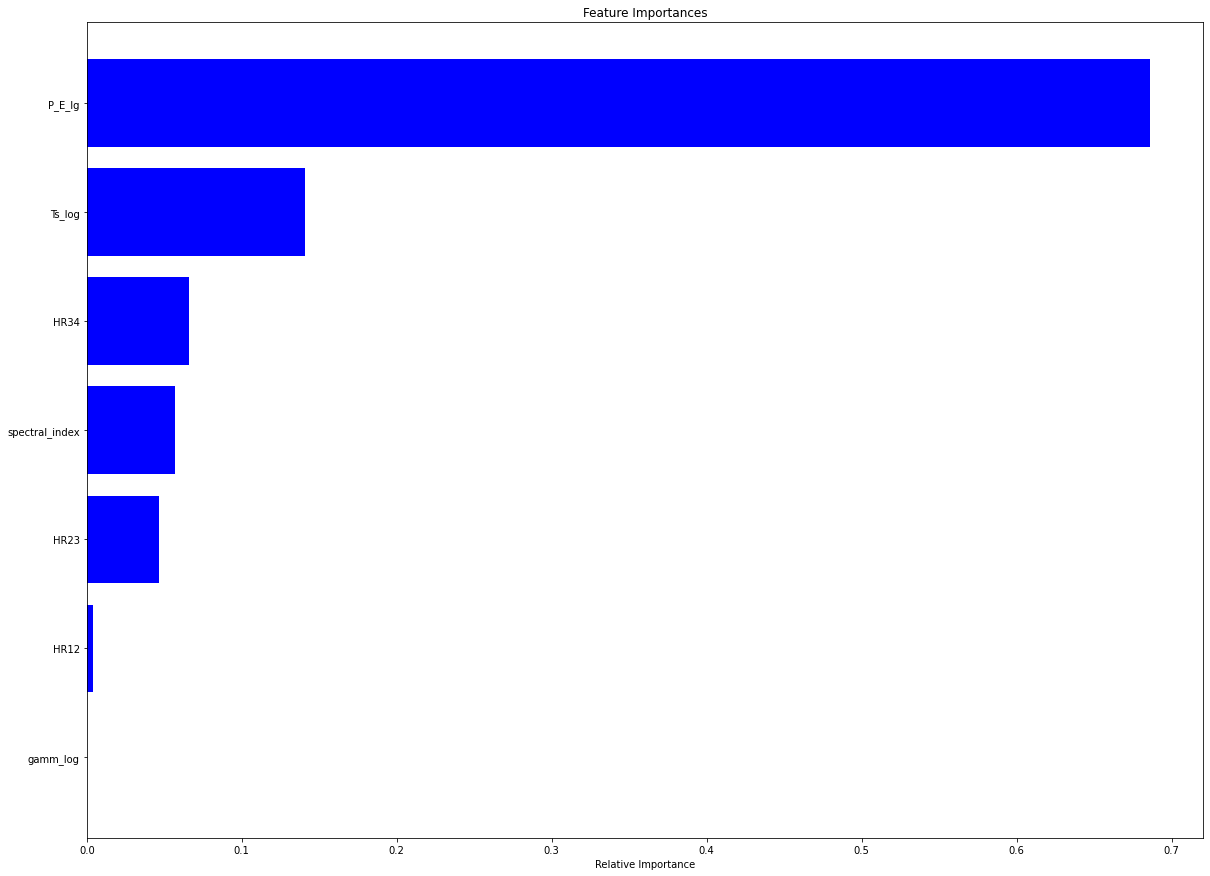

In [13]:
import pickle


# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-3)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#Calculate the accuracy score and predict target values from recovered model
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
score = pickle_model.score(X_test, y_test)
print('ok')
print("Test score: {0:.2f} %".format(100 * score))
mf.Snippet_192(pickle_model, X_test, y_test)
#tree.feature_importances_
#type(tree.feature_importances_)
# reducir el ´numero de columnas 
#X,X_std=reduce_features(features_,X) 

features = X.columns
print('Nº de caracteristicas :', len(features))
importances = pickle_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

DecisionTreeClassifier
********************Hoe to evaluate model with learning curves********************


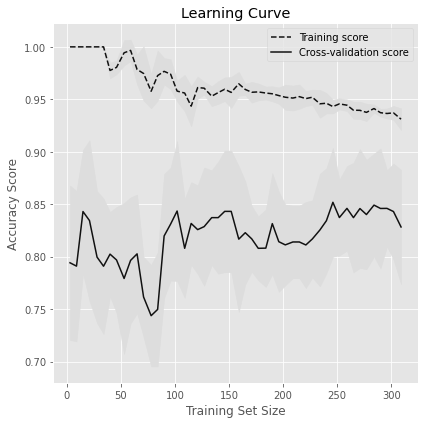

In [14]:
mf.Snippet_192(pickle_model, X_test, y_test)
#mf.Snippet_191(pickle_model, X_test, y_test) -> solo SVM de momento
mf.Snippet_188(X_test, y_test,pickle_model)

*********************Hoe to visualise cross validation scores*********************
0.7941153871793878


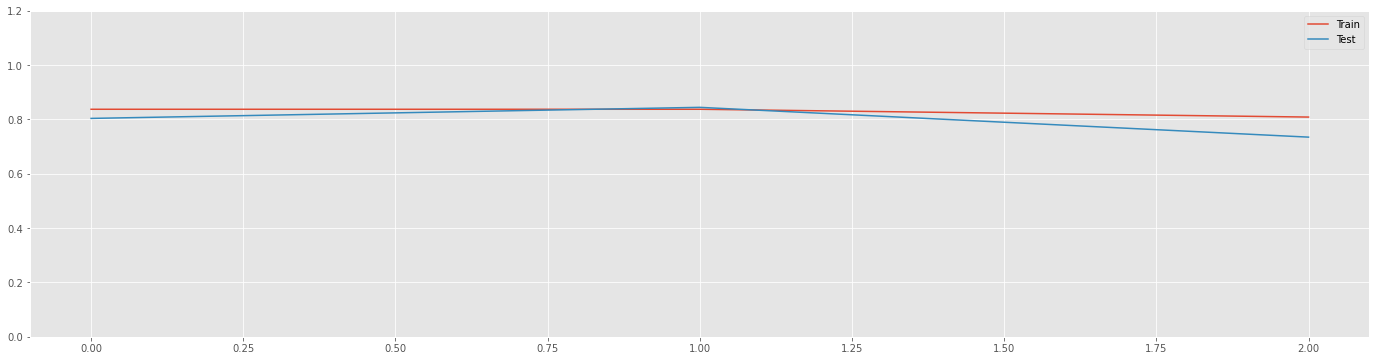

In [15]:
mf.Snippet_190(pickle_model, X_test, y_test, 3)

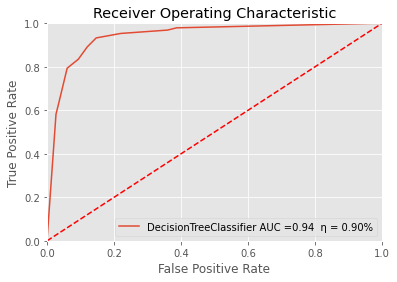

In [16]:
mf.ROC_(pickle_model, X_test,y_test )

#In order to rebuild a similar model with future versions of scikit-learn, additional metadata should be saved along the pickled model:
The training data, e.g. a reference to an immutable snapshot

The python source code used to generate the model

The versions of scikit-learn and its dependencies

The cross validation score obtained on the training data

This should make it possible to check that the cross-validation score is in the same range as before.

In [17]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
#model=tree
#pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(model, file)
#Ojo se queda convertido en cero
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')

# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-3)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values from recovered model

df_pre=df_UNK.copy()
df_pre=df_pre[features_]
df_pre.drop(['source_type'], axis=1, inplace=True)
print('Dataframe con AGNs a clasificar :', df_pre.shape)
print('Caracteristicas del modelo entrenado:', len(pickle_model.feature_importances_))
print('¡Deben ser iguales!')
#normalizamos el dtaframe A PREDECIR
sc = StandardScaler()
sc.fit(df_pre)
df_pre_std = sc.transform(df_pre)

#X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)

#score = pickle_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))
#Snippet_192(pickle_model, X_test, y_test)



Dataframe con AGNs a clasificar : (573, 7)
Caracteristicas del modelo entrenado: 7
¡Deben ser iguales!


#PREDICCION USANDO EL MODELO SALVADO

In [0]:
# REDECIMOS USANDO EL DATAFRAME INCOGNITA CON EL MODELO ENTRENADO, SALVADO Y VUELTO A CARGAR CON PICKLE_MODEL
#-----------------------------------------------------------------#
Ypredict = pickle_model.predict(df_pre_std)
#-----------------------------------------------------------------#
#Ypredict

In [19]:
#df_UNK.head(20)
#df_pre.head(5)
#X_std.shape
#COMPLETAMOS EL DATAFRAME DE LOS BLAZARS DESCONOCIDOS CON NUESTRA PREDICCIÓN 
 #-----------------------------------------------------------------# 
df_UNK['source_type']=Ypredict
df_UNK.head(5)
#-----------------------------------------------------------------#


,Unnamed: 0,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,117,170.807907,-64.260902,1.268470e-09,2.24084,0.10782,14.025361,293.535187,-3.010400,339.359985,6.514200e-11,7.074700e-12,2.629280e-11,2.118950e-12,4.524,2,2.6114,5.874740e-08,6.184800e-09,-6.154550e-09,1.469530e-11,9.574000,1.306430e-08,1.428180e-09,-1.413830e-09,8.282390e-12,9.663000,1.216690e-09,2.746420e-10,-2.659180e-10,2.492240e-12,4.895000,9.437780e-11,4.955250e-13,1.854000,2.818170e-11,2.611100e-13,2.527,210.782593,9.025927,3.128840e-07,3.964350e-08,54725.683594,2630000,0.0,0,-0.636151,-0.829607,-0.856029,0.026422,0.193456,2.530661,15.028675,0.322559,0.350411,1.176921,-0.491391,-8.896720
1,118,202.240402,-56.130901,6.763560e-09,2.21938,0.03290,46.079670,308.176086,6.358300,582.570007,3.501100e-11,1.167800e-12,7.046150e-11,2.359720e-12,5.998,2,2.3404,9.235340e-08,8.233390e-09,-8.233390e-09,2.237260e-11,11.952000,2.821480e-08,1.211760e-09,-1.211760e-09,1.891400e-11,27.768000,5.441840e-09,2.938120e-10,-2.938120e-10,1.247090e-11,26.823999,9.965950e-10,6.266210e-12,18.434000,1.578590e-10,1.893100e-12,9.420,788.263062,16.583115,3.443660e-07,3.004300e-08,56004.156250,2630000,0.0,0,-0.531969,-0.676626,-0.690423,0.013797,0.144657,2.765348,17.106525,0.130166,0.346232,1.233162,-0.885503,-8.169825
2,119,159.735199,-53.186100,1.939800e-09,2.31971,0.07696,24.437548,283.751587,4.679100,327.359985,7.086100e-11,3.901800e-12,3.157340e-11,1.598800e-12,5.330,2,2.6188,5.444920e-08,4.922340e-09,-4.922340e-09,1.305460e-11,11.671000,1.373480e-08,9.768080e-10,-9.768080e-10,8.842370e-12,15.994000,1.892330e-09,2.139180e-10,-2.063610e-10,4.104160e-12,11.592000,1.549630e-10,8.952460e-13,4.716000,1.032650e-14,1.008050e-16,0.000,914.668640,22.781076,5.224050e-07,3.202220e-08,56004.156250,2630000,0.0,0,-0.597125,-0.757815,-0.848617,0.090802,0.160689,2.515026,37.428822,0.218107,0.365434,1.573206,-0.661330,-8.712243
3,120,276.320709,-52.509300,1.993040e-09,2.01742,0.08697,21.572411,342.269989,-17.464701,714.700012,5.416700e-12,3.985900e-13,1.649350e-11,1.321550e-12,3.863,2,2.2269,1.263060e-08,3.067500e-09,-3.020100e-09,3.179230e-12,4.266000,7.096370e-09,6.141310e-10,-6.141310e-10,4.914550e-12,13.680000,1.576740e-09,1.665220e-10,-1.591710e-10,3.672690e-12,13.956000,2.878620e-10,1.822500e-12,8.611000,6.177760e-11,7.242330e-13,5.219,310.308960,13.392247,9.469290e-08,1.144430e-08,55395.359375,2630000,0.0,0,-0.280541,-0.636407,-0.691235,0.054828,0.355866,2.854124,14.384529,0.179071,0.304796,1.157896,-0.746974,-8.700484
4,121,32.697201,-51.028198,4.740330e-09,2.16971,0.03282,62.947647,276.111694,-61.767799,385.059998,5.930000e-11,1.618200e-12,5.107200e-11,1.523330e-12,4.746,2,2.3031,6.790450e-08,3.436410e-09,-3.436410e-09,1.627360e-11,22.070999,1.822940e-08,6.762120e-10,-6.762120e-10,1.217990e-11,38.094002,4.268660e-09,2.105200e-10,-2.105200e-10,9.830760e-12,38.015999,7.063220e-10,4.505460e-12,20.693001,9.707360e-11,1.242470e-12,8.745,1444.283813,27.729914,4.094160e-07,2.493990e-08,54756.121094,2630000,0.0,0,-0.576720,-0.620531,-0.716050,0.095520,0.043811,2.585528,22.944206,0.075396,0.336402,1.360673,-1.122652,-8.324191


In [20]:
# RECUENTO DE CLASIFICACION
print ('Bl Lac = 1 -- FSRQ = 0')
df_UNK['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict


Bl Lac = 1 -- FSRQ = 0


1.0    339
0.0    234
dtype: int64

In [0]:
# COMPLETAMOS LA BASE DE DATOS CON LOS NUEVOS OBJETOS CLASIFICADOS.
indices=df_UNK['Unnamed: 0'].tolist()
cols_=['nombre','source_type','ra','dec','lii','bii']
Lista_=pd.DataFrame(columns=cols_)


In [22]:
#CREAMOS DATAFRAME CON LOS OBJETOS CLASIFICADOS Y SUS NOMBRES
mf.salva_AGNs ('tree_output.csv',df_UNK,df0)


Salvando archivo : /content/drive/My Drive/tree_output.csv


In [23]:


df = pd.read_csv('/content/drive/My Drive/tree_output.csv')
df.head(5)

,nombre,source_type,ra,dec,lii,bii
0,3FGL J1123.2-6415,0.0,170.8079,-64.2609,293.5352,-3.0104
1,3FGL J1328.9-5607,0.0,202.2404,-56.1309,308.1761,6.3583
2,3FGL J1038.9-5311,0.0,159.7352,-53.1861,283.7516,4.6791
3,3FGL J1825.2-5230,1.0,276.3207,-52.5093,342.27,-17.4647
4,3FGL J0210.7-5101,0.0,32.6972,-51.0282,276.1117,-61.7678


In [24]:
# RECUENTO DE CLASIFICACION NO deben aaparecer tipo 2
print ('Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 ')
df['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict

Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 


2              8595
1.0            2682
0.0            1902
1               682
0               464
source_type      24
dtype: int64